In [1]:
from new_attempt.stateless import *

In [2]:
from custom_libraries.utilities import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
regionSymbols = RegionSymbols(1)

In [6]:
customPlanck = sq.Symbol('hbarX', real = True, positive = True, nonzero = True)

In [7]:
waveEquation = constantPotentialTimeIndependentSchroedingerEquation1D(regionSymbols, reducedPlanckConstant = customPlanck)

In [8]:
waveEquation

Eq(V_1*psi_1(x) - hbarX**2*Derivative(psi_1(x), (x, 2))/(2*m), E_{total}*psi_1(x))

In [9]:
normalization = simpleWaveFunctionNormalization(regionSymbols.startDistance, regionSymbols.distance, regionSymbols)

In [10]:
normalization

Eq(Integral(psi_1(x)*conjugate(psi_1(x)), (x, L_0, L_1)), N_1)

In [11]:
boundries = {
        regionSymbols.waveFunction(regionSymbols.startDistance) : sp.Symbol('B_{1}'), 
        regionSymbols.waveFunction(regionSymbols.distance) : sp.Symbol('B_{2}')
    }

In [12]:
generalSolution = sp.dsolve(waveEquation, ics = boundries)

In [13]:
generalSolution

Eq(psi_1(x), (B_{1}*exp(sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)) - B_{2}*exp(sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)))*exp(sqrt(2)*sqrt(m)*x*sqrt(-E_{total} + V_1)/hbarX) + (-B_{1}*exp(sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)*exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)) + B_{2}*exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)*exp(sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)/(exp(2*sqrt(2)*L_0*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX) - exp(2*sqrt(2)*L_1*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)))*exp(-sqrt(2)*sqrt(m)*x*sqrt(-E_{total} + V_1)/hbarX))

In [14]:
harmonicConstant = extractHarmonicConstant(regionSymbols, waveEquation)

In [15]:
harmonicConstant

Eq(k_1, sqrt(2)*sqrt(m)*sqrt(-E_{total} + V_1)/hbarX)

In [16]:
generalSolution = generalSolution.subs({harmonicConstant.rhs : harmonicConstant.lhs})

In [17]:
generalSolution

Eq(psi_1(x), (B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(k_1*x) + (-B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(-k_1*x))

In [18]:
def extractWaveCoefficents(exponentialEquation, position = POSITION_SYMBOL): 
    C0 = sp.Wild("C0")
    C1 = sp.Wild("C1")
    harmonic = sp.Wild("k")
    results = exponentialEquation.match(C0 * sp.exp(harmonic * position) + C1 * sp.exp(-harmonic * position))
    return {
            "transmission" : results[C0], 
            "reflection" : results[C1], 
            "harmonicConstant" : results[harmonic]
    }

In [19]:
coefficeints = extractWaveCoefficents(generalSolution.rhs, POSITION_SYMBOL)

In [20]:
coefficeints

{'transmission': B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)),
 'reflection': -B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)),
 'harmonicConstant': k_1}

In [21]:
exponential = generalSolution.subs({
        coefficeints["transmission"] : sp.Symbol("C0"), 
        coefficeints["reflection"] : sp.Symbol("C1")
    })

In [22]:
exponential

Eq(psi_1(x), C0*exp(k_1*x) + C1*exp(-k_1*x))

In [23]:
coefficeints["transmission"]

B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [24]:
coefficeints["reflection"]

-B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [25]:
integration = normalization.subs({regionSymbols.waveFunction(POSITION_SYMBOL) : exponential.rhs}).doit()

In [26]:
integration

Eq(-L_0*(C0*conjugate(C1) + C1*conjugate(C0)) + L_1*(C0*conjugate(C1) + C1*conjugate(C0)) + Piecewise((-(2*C0*k_1*exp(2*L_0*k_1)*conjugate(C0) - 2*C1*k_1*exp(-2*L_0*k_1)*conjugate(C1))/(4*k_1**2) + (2*C0*k_1*exp(2*L_1*k_1)*conjugate(C0) - 2*C1*k_1*exp(-2*L_1*k_1)*conjugate(C1))/(4*k_1**2), Ne(k_1, 0)), (-L_0*(C0*conjugate(C0) + C1*conjugate(C1)) + L_1*(C0*conjugate(C0) + C1*conjugate(C1)), True)), N_1)

In [27]:
integration.lhs

-L_0*(C0*conjugate(C1) + C1*conjugate(C0)) + L_1*(C0*conjugate(C1) + C1*conjugate(C0)) + Piecewise((-(2*C0*k_1*exp(2*L_0*k_1)*conjugate(C0) - 2*C1*k_1*exp(-2*L_0*k_1)*conjugate(C1))/(4*k_1**2) + (2*C0*k_1*exp(2*L_1*k_1)*conjugate(C0) - 2*C1*k_1*exp(-2*L_1*k_1)*conjugate(C1))/(4*k_1**2), Ne(k_1, 0)), (-L_0*(C0*conjugate(C0) + C1*conjugate(C1)) + L_1*(C0*conjugate(C0) + C1*conjugate(C1)), True))

In [28]:
integration.rhs

N_1

In [29]:
extractedConditions = extractNonZero(integration.lhs)

In [30]:
nonZeroNormalizationCase = sp.Eq(extractedConditions["rest"] + extractedConditions["nonZero"], integration.rhs)

In [31]:
nonZeroNormalizationCase

Eq(-L_0*(C0*conjugate(C1) + C1*conjugate(C0)) + L_1*(C0*conjugate(C1) + C1*conjugate(C0)) - (2*C0*k_1*exp(2*L_0*k_1)*conjugate(C0) - 2*C1*k_1*exp(-2*L_0*k_1)*conjugate(C1))/(4*k_1**2) + (2*C0*k_1*exp(2*L_1*k_1)*conjugate(C0) - 2*C1*k_1*exp(-2*L_1*k_1)*conjugate(C1))/(4*k_1**2), N_1)

In [32]:
c0solutions = sp.solve(nonZeroNormalizationCase, sp.Symbol("C0"))

In [33]:
len(c0solutions)

2

In [34]:
c0solutions[0]

(-2*C1*L_0*k_1*exp(k_1*(L_0 + L_1)) + 2*C1*L_1*k_1*exp(k_1*(L_0 + L_1)) - sqrt(4*C1**2*L_0**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - 8*C1**2*L_0*L_1*k_1**2*exp(2*k_1*(L_0 + L_1)) + 4*C1**2*L_1**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - C1**2*exp(4*L_0*k_1) - C1**2*exp(4*L_1*k_1) + 2*C1**2*exp(2*k_1*(L_0 + L_1)) + 2*N_1*k_1*exp(2*k_1*(L_0 + 2*L_1)) - 2*N_1*k_1*exp(2*k_1*(2*L_0 + L_1))))*exp(-k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [35]:
c0solutions[1]

(-2*C1*L_0*k_1*exp(k_1*(L_0 + L_1)) + 2*C1*L_1*k_1*exp(k_1*(L_0 + L_1)) + sqrt(4*C1**2*L_0**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - 8*C1**2*L_0*L_1*k_1**2*exp(2*k_1*(L_0 + L_1)) + 4*C1**2*L_1**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - C1**2*exp(4*L_0*k_1) - C1**2*exp(4*L_1*k_1) + 2*C1**2*exp(2*k_1*(L_0 + L_1)) + 2*N_1*k_1*exp(2*k_1*(L_0 + 2*L_1)) - 2*N_1*k_1*exp(2*k_1*(2*L_0 + L_1))))*exp(-k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [36]:
c1solutions = sp.solve(nonZeroNormalizationCase, sp.Symbol("C1"))

In [37]:
len(c1solutions)

2

In [38]:
c1solutions[0]

(-2*C0*L_0*k_1*exp(k_1*(L_0 + L_1)) + 2*C0*L_1*k_1*exp(k_1*(L_0 + L_1)) - sqrt(4*C0**2*L_0**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - 8*C0**2*L_0*L_1*k_1**2*exp(2*k_1*(L_0 + L_1)) + 4*C0**2*L_1**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - C0**2*exp(4*L_0*k_1) - C0**2*exp(4*L_1*k_1) + 2*C0**2*exp(2*k_1*(L_0 + L_1)) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1)))*exp(k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [39]:
c1solutions[1]

(-2*C0*L_0*k_1*exp(k_1*(L_0 + L_1)) + 2*C0*L_1*k_1*exp(k_1*(L_0 + L_1)) + sqrt(4*C0**2*L_0**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - 8*C0**2*L_0*L_1*k_1**2*exp(2*k_1*(L_0 + L_1)) + 4*C0**2*L_1**2*k_1**2*exp(2*k_1*(L_0 + L_1)) - C0**2*exp(4*L_0*k_1) - C0**2*exp(4*L_1*k_1) + 2*C0**2*exp(2*k_1*(L_0 + L_1)) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1)))*exp(k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [40]:
c0Equation = sp.Eq(coefficeints["transmission"] * coefficeints["transmission"], (c0solutions[0] * c0solutions[1]).simplify())

In [41]:
c0Equation

Eq((B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))**2, (C1**2*exp(2*L_0*k_1) - C1**2*exp(2*L_1*k_1) + 2*N_1*k_1*exp(2*k_1*(L_0 + L_1)))*exp(-2*k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))

In [42]:
c1solutions.append(sp.solve(c0Equation, sp.Symbol("C1")))

In [43]:
len(c1solutions[2])

2

In [44]:
c1solutions[2][0]

-sqrt(B_{1}**2*exp(2*L_0*k_1) - 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) + B_{2}**2*exp(2*L_1*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))*exp(k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [45]:
c1solutions[2][1]

sqrt(B_{1}**2*exp(2*L_0*k_1) - 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) + B_{2}**2*exp(2*L_1*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))*exp(k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [46]:
c1ConstrainedSolution = sp.Eq(sp.Symbol("C1") ** 2, (c1solutions[2][0] * c1solutions[2][1]).simplify().refine())

In [47]:
c1ConstrainedSolution

Eq(C1**2, (-B_{1}**2*exp(2*L_0*k_1) + 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) - B_{2}**2*exp(2*L_1*k_1) + 2*N_1*k_1*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_1*k_1))*exp(2*k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))**2)

In [48]:
c1Equation = sp.Eq(coefficeints["reflection"] * coefficeints["reflection"], (c1solutions[0] * c1solutions[1]).simplify())

In [49]:
c1Equation

Eq((-B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))**2, (C0**2*exp(2*L_0*k_1) - C0**2*exp(2*L_1*k_1) + 2*N_1*k_1)*exp(2*k_1*(L_0 + L_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))

In [50]:
c0solutions.append(sp.solve(c1Equation, sp.Symbol("C0")))

In [51]:
len(c0solutions[2])

2

In [52]:
c0solutions[2][0]

-sqrt(B_{1}**2*exp(2*L_1*k_1) - 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) + B_{2}**2*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [53]:
c0solutions[2][1]

sqrt(B_{1}**2*exp(2*L_1*k_1) - 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) + B_{2}**2*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [54]:
c0ConstrainedSolution = sp.Eq(sp.Symbol("C0") ** 2, (c0solutions[2][0] * c0solutions[2][1]).simplify().refine())

In [55]:
c0ConstrainedSolution

Eq(C0**2, (-B_{1}**2*exp(2*L_1*k_1) + 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) - B_{2}**2*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_1*k_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))**2)

In [56]:
(exponential.rhs * sp.conjugate(exponential.rhs)).expand()

C0*exp(2*k_1*x)*conjugate(C0) + C0*conjugate(C1) + C1*conjugate(C0) + C1*exp(-2*k_1*x)*conjugate(C1)

In [57]:
c0solutions[2][0]

-sqrt(B_{1}**2*exp(2*L_1*k_1) - 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) + B_{2}**2*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [58]:
c0solutions[2][1]

sqrt(B_{1}**2*exp(2*L_1*k_1) - 2*B_{1}*B_{2}*exp(k_1*(L_0 + L_1)) + B_{2}**2*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [59]:
c0solutions[2][1] + c0solutions[2][0]

0

In [60]:
c0solutions[2][1].free_symbols

{B_{1}, B_{2}, L_0, L_1, N_1, k_1}

In [61]:
sanitized_B1 = sp.Symbol("B1")

In [62]:
sanitized_B2 = sp.Symbol("B2")

In [63]:
fs = list(c0solutions[2][1].free_symbols)

In [64]:
fs

[k_1, N_1, L_1, B_{1}, L_0, B_{2}]

In [65]:
bs = [s for s in fs if str(s)[0] == "B"]

In [66]:
bs

[B_{1}, B_{2}]

In [67]:
b1s = [s for s in bs if str(s)[3] == "1"]

In [68]:
b1s = b1s[0]

In [69]:
b1s

B_{1}

In [70]:
b2s = [s for s in bs if str(s)[3] == "2"]

In [71]:
b2s = b2s[0]

In [72]:
b2s

B_{2}

In [73]:
sanitizeReplace = {b1s : sanitized_B1, b2s : sanitized_B2}

In [74]:
parameters = [s.subs(sanitizeReplace) for s in fs]

In [75]:
parameters

[k_1, N_1, L_1, B1, L_0, B2]

In [76]:
c0ToLambdify = []

In [77]:
c0ToLambdify.append(c0solutions[2][0].subs(sanitizeReplace))

In [78]:
c0ToLambdify.append(c0solutions[2][1].subs(sanitizeReplace))

In [79]:
c0ToLambdify[-1]

sqrt(B1**2*exp(2*L_1*k_1) - 2*B1*B2*exp(k_1*(L_0 + L_1)) + B2**2*exp(2*L_0*k_1) - 2*N_1*k_1*exp(2*L_0*k_1) + 2*N_1*k_1*exp(2*L_1*k_1))/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [80]:
c0_1 = sp.lambdify(parameters, c0ToLambdify[1])

In [81]:
c0_1

<function _lambdifygenerated(k_1, N_1, L_1, B1, L_0, B2)>

In [82]:
arguments = {
    "L_0" : .1, 
    "N_1" : 1, 
    "k_1" : .1,
    "B2" : .1, 
    "B1" : .1, 
    "L_1" : .15
}

In [83]:
c0_1(**arguments)

-4.416849015363602

In [84]:
# if L1 > L0 then its real (I think)

In [85]:
c1ToLambdify = []

In [86]:
c1ToLambdify.append(c1solutions[2][0].subs(sanitizeReplace))

In [87]:
c1ToLambdify.append(c1solutions[2][1].subs(sanitizeReplace))

In [88]:
c1_1 = c0_1 = sp.lambdify(parameters, c1ToLambdify[1])

In [89]:
c1_1(**arguments)

-4.528662080525736

In [90]:
coefficeints["transmission"]

B_{1}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{2}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [91]:
coefficeints["reflection"]

-B_{1}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{2}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1))

In [92]:
parameters

[k_1, N_1, L_1, B1, L_0, B2]

In [93]:
unconstrained_c0 = sp.lambdify(parameters, coefficeints["transmission"].subs(sanitizeReplace))

In [94]:
unconstrained_c1 = sp.lambdify(parameters, coefficeints["reflection"].subs(sanitizeReplace))

In [95]:
unconstrained_c0(**arguments)

0.04937873571606488

In [96]:
unconstrained_c1(**arguments)

0.050628764362063094

In [97]:
expanded = (exponential.rhs * sp.conjugate(exponential.rhs)).expand()

In [98]:
expanded

C0*exp(2*k_1*x)*conjugate(C0) + C0*conjugate(C1) + C1*conjugate(C0) + C1*exp(-2*k_1*x)*conjugate(C1)

In [99]:
expanded.free_symbols

{C0, C1, k_1, x}

In [100]:
sanitizeReplace

{B_{1}: B1, B_{2}: B2}

In [101]:
probaility = sp.lambdify(list(expanded.free_symbols), expanded)

In [102]:
probaility

<function _lambdifygenerated(x, k_1, C0, C1)>

In [103]:
unconstrainedArguments = {
    "C0" : unconstrained_c0(**arguments), 
    "C1" : unconstrained_c1(**arguments), 
    "k_1" : arguments["k_1"], 
}

In [104]:
constrainedArguments = {
    "C0" : c0_1(**arguments), 
    "C1" : c1_1(**arguments), 
    "k_1" : arguments["k_1"], 
}

In [105]:
constrainedProbability = lambda x : probaility(x, constrainedArguments["k_1"], constrainedArguments["C1"], constrainedArguments["C0"])

In [106]:
unconstrainedProbability = lambda x : probaility(x, unconstrainedArguments["k_1"], unconstrainedArguments["C1"], unconstrainedArguments["C0"])

In [107]:
import matplotlib.pyplot as plt

In [108]:
import numpy

In [109]:
xs = np.arange(100) / 100

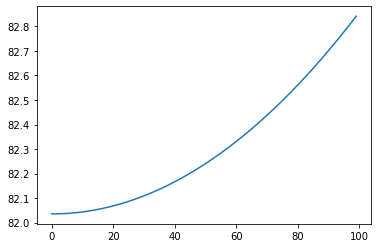

In [110]:
plt.plot(constrainedProbability(xs))

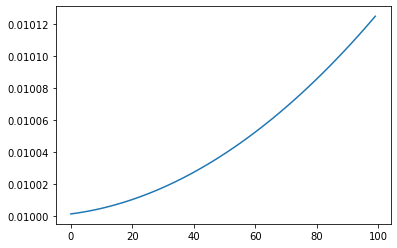

In [111]:
plt.plot(unconstrainedProbability(xs))

In [ ]:
sp.approximants(